In [3]:
import numpy as np
import pandas as pd

#loading dataset
data = pd.read_csv('/Titanic-Dataset.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#displaying null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
Survived = data[data["Survived"]==1]
Non_Survived = data[data["Survived"]==0]
outlier = len(Survived)/float(len(Non_Survived))
print(outlier)
print("Survived : {} " .format(len(Survived)))
print("Non_Survived : {} " .format(len(Non_Survived)))

0.6229508196721312
Survived : 342 
Non_Survived : 549 


<Axes: xlabel='Survived', ylabel='count'>

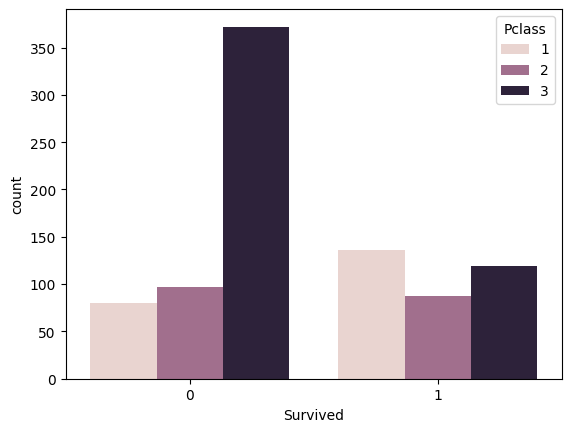

In [9]:
import seaborn as sns
sns.countplot(x = data['Survived'], hue = data['Pclass'])

<Axes: xlabel='Survived', ylabel='count'>

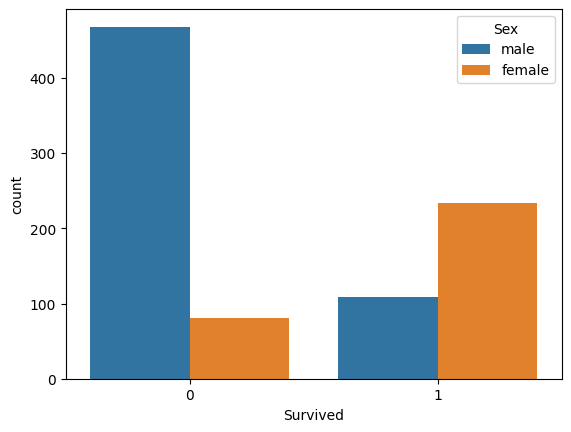

In [10]:
sns.countplot(x = data['Survived'], hue = data['Sex'])

In [11]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [12]:
labelencoder = LabelEncoder() # Conversion of Categorical values into Numerical values
data['Sex'] = labelencoder.fit_transform(data['Sex'])

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [13]:
features = data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]
target = data["Survived"]

In [14]:
data['Age'].fillna(data['Age'].median(), inplace = True)

In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
x = data[['Pclass','Sex']]
y = target

In [17]:
x_train, x_test, y_train, y_test = train_test_split(features,y,test_size = 0.2, random_state = 0)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

In [18]:
model = RandomForestClassifier()
model.fit(x_train_imputed, y_train)

RandomForestClassifier()

In [19]:
predictions = model.predict(x_test_imputed)

In [20]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score
acc = accuracy_score(y_test , predictions)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test , predictions)
print("The precision is {}".format(prec))

rec = recall_score(y_test , predictions)
print("The recall is {}".format(rec))

f1 = f1_score(y_test , predictions)
print("The F1-Score is {}".format(f1))

The accuracy is 0.8268156424581006
The precision is 0.8166666666666667
The recall is 0.7101449275362319
The F1-Score is 0.7596899224806202


In [21]:
import joblib
joblib.dump(model,"Titanic_Survival")

['Titanic_Survival']

In [22]:
m = joblib.load("Titanic_Survival")

In [23]:
prediction  = m.predict([[1,1,0,1,1,1]])
prediction

array([1])

In [24]:
if prediction==0:
  print("Did not survive")
else:
  print("Survived")

Survived
